In [200]:
# importing libraries. We'll keep importing more as we go on

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay


In [201]:
# reading in the dataset with appropriate column names from data.name
# quality is our target, this is a classification problem

df = pd.read_csv('wdbc.data', 
                      names = ['ID', 'Diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error','smoothness error', 'compactness error', 'concavity error','concave points error', 'symmetry error','fractal dimension error', 'worst radius', 'worst texture','worst perimeter', 'worst area', 'worst smoothness','worst compactness', 'worst concavity', 'worst concave points','worst symmetry', 'worst fractal dimension'])
df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [202]:
diagnosis_d = dict(zip(['M', 'B'], [0, 1]))
print(diagnosis_d)
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: diagnosis_d[x])

{'M': 0, 'B': 1}


In [203]:

df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [204]:
# getting the target attribute in a separate numpy array
#.  and removing that column from df

index = df['ID'].values
y = df['Diagnosis'].values
df = df.drop(columns=['ID', 'Diagnosis'])

In [205]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [206]:


df = df.apply(LabelEncoder().fit_transform)

In [207]:
#Logistic Regresssion

average_accuracy = 0  # Initialize average accuracy
accuracies = []
k_folds = 5
kf = KFold(n_splits=5)
print(kf)
for k, (train, test) in enumerate(kf.split(df, y)):
    
    X_train, X_test, y_train, y_test = df.loc[train], df.loc[test], y[train], y[test]
    
    # Identify train and test indices for the current fold

    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the SGDClassifier (logistic regression)
    training = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', penalty=None))
    training.fit(X_train, y_train)

    # Test the classifier
    y_pred = training.predict(X_test)

    # Calculate and print accuracy for each fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold {k + 1} Accuracy: {accuracy}')
    print("f1_score is: ", f1_score(y_test, y_pred, average='macro'))
    print("confusion matrix: \n", confusion_matrix(y_test, y_pred))

# Calculate and print average accuracy
average_accuracy = sum(accuracies)/k_folds
print(f'Average Accuracy: {average_accuracy}')


KFold(n_splits=5, random_state=None, shuffle=False)
Fold 1 Accuracy: 0.9298245614035088
f1_score is:  0.928030303030303
confusion matrix: 
 [[62  6]
 [ 2 44]]
Fold 2 Accuracy: 0.9122807017543859
f1_score is:  0.9100378787878788
confusion matrix: 
 [[43  6]
 [ 4 61]]
Fold 3 Accuracy: 0.9736842105263158
f1_score is:  0.9712773998488284
confusion matrix: 
 [[39  1]
 [ 2 72]]
Fold 4 Accuracy: 0.956140350877193
f1_score is:  0.9440463335623834
confusion matrix: 
 [[28  1]
 [ 4 81]]
Fold 5 Accuracy: 0.9203539823008849
f1_score is:  0.8944254126440361
confusion matrix: 
 [[24  2]
 [ 7 80]]
Average Accuracy: 0.9384567613724577


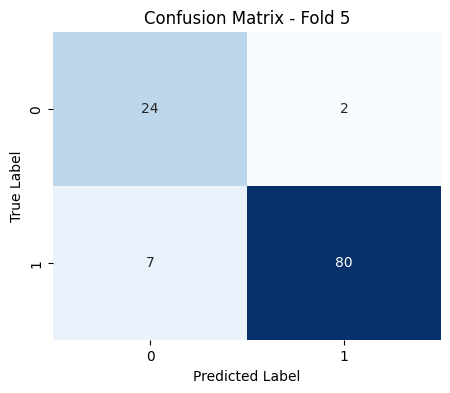

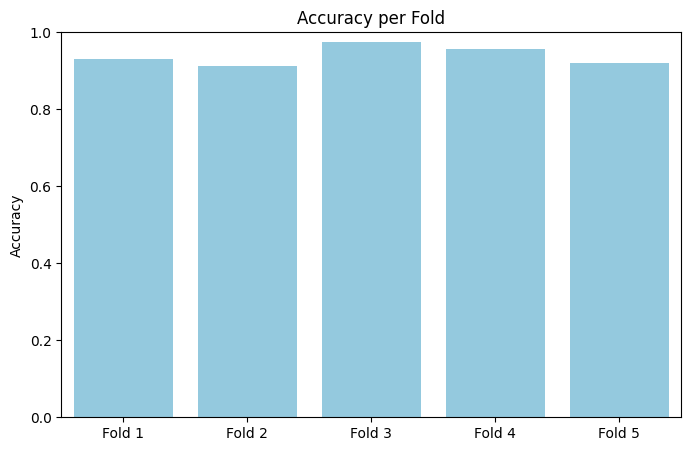

In [208]:
cm_lr = confusion_matrix(y_test, y_pred)

#Confusion Matrix Fold 5
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Fold {k+1}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Accuracy Per Fold
plt.figure(figsize=(8,5))
sns.barplot(x=[f'Fold {i+1}' for i in range(k_folds)], y=accuracies, color="skyblue")
plt.title('Accuracy per Fold')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [209]:


average_accuracy_mlp = 0  # Initialize average accuracy for MLPClassifier
accuracies_mlp = []

k_folds = 5
kf = KFold(n_splits=5)
print(kf)
for k, (train, test) in enumerate(kf.split(df, y)):
    
    X_train, X_test, y_train, y_test = df.loc[train], df.loc[test], y[train], y[test]
    
    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the MLPClassifier (Neural Networks)
    mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter = 1000,  early_stopping=True)
    mlp.fit(X_train, y_train)

    # Test the classifier
    y_pred_mlp = mlp.predict(X_test)

    # Calculate and print accuracy for each fold
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    accuracies_mlp.append(accuracy_mlp)
    print(f'Fold {k + 1} Accuracy (MLPClassifier): {accuracy_mlp}')
    print("f1_score is: ", f1_score(y_test, y_pred_mlp, average='macro'))
    print("confusion matrix: \n", confusion_matrix(y_test, y_pred_mlp))
    
    # Accumulate accuracy for averaging later
    average_accuracy_mlp += accuracy_mlp

# Calculate and print average accuracy for MLPClassifier
average_accuracy_mlp = sum(accuracies_mlp)/k_folds
print(f'Average Accuracy (MLPClassifier): {average_accuracy_mlp}')


KFold(n_splits=5, random_state=None, shuffle=False)
Fold 1 Accuracy (MLPClassifier): 0.9385964912280702
f1_score is:  0.9375146817007283
confusion matrix: 
 [[61  7]
 [ 0 46]]
Fold 2 Accuracy (MLPClassifier): 0.9298245614035088
f1_score is:  0.9271099744245523
confusion matrix: 
 [[42  7]
 [ 1 64]]
Fold 3 Accuracy (MLPClassifier): 0.9649122807017544
f1_score is:  0.9614864864864865
confusion matrix: 
 [[38  2]
 [ 2 72]]
Fold 4 Accuracy (MLPClassifier): 0.9649122807017544
f1_score is:  0.9547619047619047
confusion matrix: 
 [[28  1]
 [ 3 82]]
Fold 5 Accuracy (MLPClassifier): 0.9823008849557522
f1_score is:  0.9750221043324492
confusion matrix: 
 [[25  1]
 [ 1 86]]
Average Accuracy (MLPClassifier): 0.9561092997981679


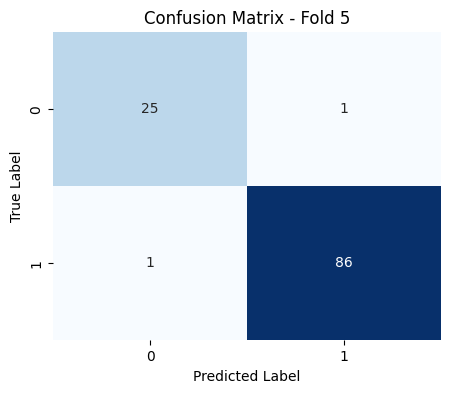

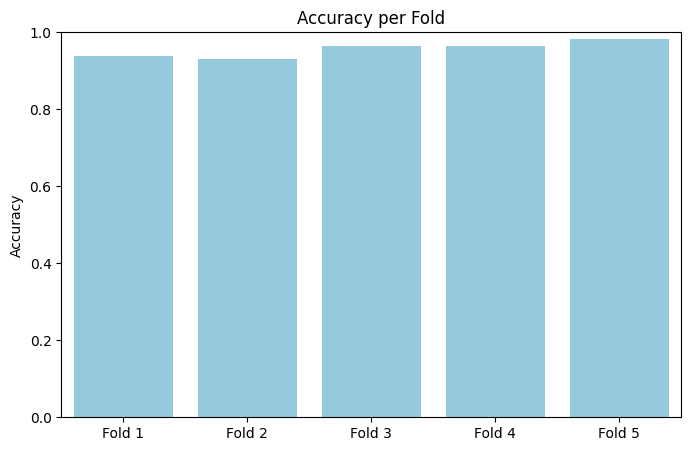

In [210]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

#Confusion Matrix Fold 5
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Fold {k+1}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Accuracy Per Fold
plt.figure(figsize=(8,5))
sns.barplot(x=[f'Fold {i+1}' for i in range(k_folds)], y=accuracies_mlp, color="skyblue")
plt.title('Accuracy per Fold')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()